In [1]:
import generate_models as gm
import read_data as rd
import numpy as np
from scipy.interpolate import interp1d as interp
from matplotlib import pyplot as plt

## Extension of the MS

### Current status

In [2]:
xsun = 0.7381
ysun = 0.2485

In [25]:
def currentguess(Mmin=1, Mmax=15, howmany=200):
    M_ref = [1,3,15]
    p_ref = [1.482e17, 1.141e17, 2.769e16]
    T_ref = [1.442e7, 2.347e7, 3.275e7]
    R_ref = [6.932e10, 1.276e11, 3.289e11]
    L_ref = [0.9083, 89.35, 1.960e4]    # it seems that one is logarithmically
                                        #spaced!

    
    newM_ref = [0.08,0.306,0.533,0.759,0.986,1.212,1.439,1.665,1.892,2.118,2.345,2.571,2.798,3.024,3.251,3.477,3.703,3.93,4.156,4.383,4.609,4.836,5.062,5.289,5.515,5.742,5.968,6.195,6.421,6.647,6.874,7.1,7.327,7.553,7.78,8.006,8.233,8.459,8.686,8.912,9.139,9.365,9.592,9.818,10.044,10.271,10.497,10.724,10.95,11.177,11.403,11.63,11.856,12.083,12.309,12.536,12.762,12.988,13.215,13.441,13.668,13.894,14.121,14.347,14.574,14.8,15.027,15.253,15.48,15.706,15.933,16.159,16.385,16.612,16.838,17.065,17.291,17.518,17.744,17.971,18.197,18.424,18.65,18.877,19.103,19.329,19.556,19.782,20.009,20.235,20.462,20.688,20.915,21.141,21.368,21.594,21.821,22.047,22.274,22.5]
    newp_ref = [2.5913e+16,5.465e+16,8.6424e+16,1.2353e+17,1.6988e+17,2.0925e+17,2.1463e+17,2.0247e+17,1.867e+17,1.714e+17,1.5756e+17,1.4535e+17,1.3462e+17,1.252e+17,1.1691e+17,1.0958e+17,1.0307e+17,9.7261e+16,9.2064e+16,8.739e+16,8.3173e+16,7.9351e+16,7.5877e+16,7.2709e+16,6.981e+16,6.7149e+16,6.4702e+16,6.2444e+16,6.0357e+16,5.8422e+16,5.6623e+16,5.495e+16,5.3393e+16,5.1936e+16,5.0572e+16,4.9293e+16,4.8092e+16,4.6963e+16,4.5902e+16,4.49e+16,4.3954e+16,4.306e+16,4.2213e+16,4.1408e+16,4.0646e+16,3.9924e+16,3.9235e+16,3.858e+16,3.7956e+16,3.7361e+16,3.6792e+16,3.625e+16,3.5732e+16,3.5235e+16,3.4761e+16,3.4305e+16,3.3869e+16,3.3442e+16,3.3042e+16,3.2658e+16,3.2289e+16,3.1932e+16,3.1587e+16,3.1255e+16,3.0936e+16,3.0627e+16,3.0329e+16,3.0043e+16,2.9765e+16,2.9496e+16,2.9238e+16,2.8987e+16,2.8744e+16,2.8509e+16,2.8282e+16,2.8061e+16,2.7848e+16,2.764e+16,2.7439e+16,2.7244e+16,2.7055e+16,2.6872e+16,2.6692e+16,2.6518e+16,2.6348e+16,2.6185e+16,2.6024e+16,2.5869e+16,2.5717e+16,2.557e+16,2.5427e+16,2.5287e+16,2.515e+16,2.5017e+16,2.4888e+16,2.4761e+16,2.4638e+16,2.4517e+16,2.44e+16,2.4285e+16]
    newT_ref = [3601400.0,7140800.0,9772800.0,12226000.0,14877000.0,17511000.0,19333000.0,20503000.0,21371000.0,22080000.0,22690000.0,23233000.0,23724000.0,24176000.0,24594000.0,24985000.0,25352000.0,25698000.0,26026000.0,26337000.0,26633000.0,26915000.0,27185000.0,27443000.0,27691000.0,27929000.0,28158000.0,28378000.0,28591000.0,28796000.0,28993000.0,29185000.0,29372000.0,29552000.0,29726000.0,29896000.0,30060000.0,30220000.0,30374000.0,30525000.0,30671000.0,30814000.0,30953000.0,31090000.0,31222000.0,31351000.0,31478000.0,31601000.0,31722000.0,31839000.0,31955000.0,32068000.0,32177000.0,32285000.0,32391000.0,32494000.0,32595000.0,32694000.0,32792000.0,32889000.0,32982000.0,33074000.0,33165000.0,33252000.0,33339000.0,33426000.0,33510000.0,33593000.0,33674000.0,33757000.0,33832000.0,33910000.0,33986000.0,34061000.0,34135000.0,34207000.0,34279000.0,34349000.0,34418000.0,34486000.0,34554000.0,34620000.0,34685000.0,34750000.0,34813000.0,34876000.0,34938000.0,34998000.0,35058000.0,35117000.0,35176000.0,35234000.0,35291000.0,35347000.0,35403000.0,35457000.0,35511000.0,35565000.0,35618000.0,35670000.0]
    newR_ref = [15891000000.0,27430000000.0,36770000000.0,50125000000.0,73183000000.0,84394000000.0,87326000000.0,91751000000.0,96810000000.0,102090000000.0,107420000000.0,112730000000.0,117970000000.0,123140000000.0,128220000000.0,133210000000.0,138120000000.0,142940000000.0,147680000000.0,152340000000.0,156920000000.0,161430000000.0,165870000000.0,170240000000.0,174550000000.0,178790000000.0,182970000000.0,187100000000.0,191170000000.0,195180000000.0,199130000000.0,203040000000.0,206930000000.0,210740000000.0,214520000000.0,218250000000.0,221940000000.0,225580000000.0,229170000000.0,232730000000.0,236250000000.0,239740000000.0,243190000000.0,246610000000.0,249980000000.0,253330000000.0,256640000000.0,259920000000.0,263170000000.0,266390000000.0,269580000000.0,272740000000.0,275860000000.0,278960000000.0,282040000000.0,285090000000.0,288110000000.0,291070000000.0,294060000000.0,297020000000.0,299950000000.0,302850000000.0,305730000000.0,308570000000.0,311410000000.0,314220000000.0,317010000000.0,319780000000.0,322530000000.0,325270000000.0,327970000000.0,330660000000.0,333330000000.0,335980000000.0,338620000000.0,341230000000.0,343830000000.0,346410000000.0,348980000000.0,351530000000.0,354060000000.0,356590000000.0,359080000000.0,361560000000.0,364020000000.0,366490000000.0,368920000000.0,371360000000.0,373770000000.0,376170000000.0,378560000000.0,380930000000.0,383280000000.0,385640000000.0,387970000000.0,390290000000.0,392620000000.0,394900000000.0,397200000000.0,399460000000.0]
    newL_ref = [3.113149665447022e-05,0.007930489601281983,0.07466206543779416,0.3306739627988451,1.130576619657078,2.989509927814587,6.16311114741984,11.033162127669812,18.14261982038613,28.07372232343648,41.40950127434677,58.74893525297766,80.7049178911866,107.86983141660878,140.83156323665284,180.13578646691397,226.51658212545954,280.41419854536935,342.29456231604144,412.8573303779981,492.6063433495771,581.9691989817644,681.3966592828317,791.589454624261,912.8512193311221,1045.442135694148,1190.1453387038553,1347.1005082758036,1516.7010939163386,1699.417162886752,1895.3961755993425,2105.2321804752323,2331.309857418028,2570.987706415226,2824.8799749157074,3095.2804165939788,3380.6483620598156,3681.289736425313,3995.765566188054,4329.123745028265,4678.428536839501,5043.128102663999,5426.252513290146,5829.079788672337,6247.4098790155385,6680.362046792469,7133.456216702232,7605.013686927006,8094.685874176842,8602.01112713024,9132.716996648163,9676.09224577728,10235.286413287924,10816.829893379321,11415.633046188459,12033.722711826847,12673.600118311286,13322.937789769398,14005.544572422317,14706.184154045619,15424.105957495969,16154.741014619049,16916.090502776344,17672.5817784194,18462.903509747837,19288.568602156247,20114.071982009064,20974.90487978542,21847.41206479047,22766.69555330906,23642.85942401745,24581.025650893436,25527.013026612472,26497.20098878961,27485.269519646674,28497.05627341151,29525.686217289687,30577.3609569008,31644.62838835526,32726.533057537137,33837.63488617649,34954.250959859964,36107.71451003529,37273.48496903333,38459.178204535354,39655.18679916798,40888.38902676978,42121.12867540669,43381.04405465888,44658.07512933513,45962.11446660011,47282.453051179604,48618.325846498374,49980.43135782396,51357.04178483559,52747.27156616844,54150.19189534895,55590.42572704037,57042.690309986894,58505.945195000575]
    M_ref = M_ref + newM_ref
    p_ref = p_ref + newp_ref
    T_ref = T_ref + newT_ref
    R_ref = R_ref + newR_ref
    L_ref = L_ref + newL_ref
    
    # interpolating function
    p_int = interp(M_ref, p_ref, fill_value='extrapolate', kind='cubic')
    T_int = interp(M_ref, T_ref, fill_value='extrapolate',kind='cubic')
    R_int = interp(M_ref, R_ref, fill_value='extrapolate',kind='cubic')
    loglogL_int = interp(np.log(M_ref), np.log(L_ref), fill_value='extrapolate',kind='cubic')

    # interpolated values
    M = np.linspace(Mmin, Mmax, howmany)
    p = p_int(M)
    T = T_int(M)
    R = R_int(M)
    L = np.exp(loglogL_int(np.log(M)))
        
    # models
    models = [[M[i], p[i], T[i], R[i], L[i]] for i in range(M.size)]

    return models


# general scan
mmin = 22.5
mmax = 32.5
hm = 10
converged_parameters, worked = gm.do_pipeline_models_zams_work(Mmin=mmin, Mmax=mmax, howmany=hm, x=xsun, y=ysun, msguess=currentguess)
models = currentguess(Mmin=mmin, Mmax=mmax, howmany=hm)
workingvalues = [models[i] for i, x in enumerate(worked) if x]

Starting model no. 0
Starting model no. 1
Starting model no. 2
Starting model no. 3
Starting model no. 4
Starting model no. 5
Starting model no. 6
Starting model no. 7
Starting model no. 8
Starting model no. 9


In [27]:
worked

[True, True, True, True, True, False, False, False, False, False]

In [19]:
string=''
for i,t in enumerate(worked):
    if t == True:
        string=string+'{},'.format(converged_parameters[i][8])
string

'3.113149665447022e-05,0.007930489601281983,0.07466206543779416,0.3306739627988451,1.130576619657078,2.989509927814587,6.16311114741984,11.033162127669812,18.14261982038613,28.07372232343648,41.40950127434677,58.74893525297766,80.7049178911866,107.86983141660878,140.83156323665284,180.13578646691397,226.51658212545954,280.41419854536935,342.29456231604144,412.8573303779981,492.6063433495771,581.9691989817644,681.3966592828317,791.589454624261,912.8512193311221,1045.442135694148,1190.1453387038553,1347.1005082758036,1516.7010939163386,1699.417162886752,1895.3961755993425,2105.2321804752323,2331.309857418028,2570.987706415226,2824.8799749157074,3095.2804165939788,3380.6483620598156,3681.289736425313,3995.765566188054,4329.123745028265,4678.428536839501,5043.128102663999,5426.252513290146,5829.079788672337,6247.4098790155385,6680.362046792469,7133.456216702232,7605.013686927006,8094.685874176842,8602.01112713024,9132.716996648163,9676.09224577728,10235.286413287924,10816.829893379321,1141

In [27]:
[converged_parameters[i][4] for i,t in enumerate(worked) if t == True]

[3601400.0,
 6798300.0,
 9247100.0,
 11382000.0,
 13666000.0,
 16084000.0,
 18217000.0,
 19628000.0,
 20607000.0,
 21368000.0,
 22004000.0,
 22559000.0,
 23056000.0,
 23509000.0,
 23927000.0,
 24316000.0,
 24681000.0,
 25025000.0,
 25350000.0,
 25658000.0,
 25952000.0,
 26232000.0,
 26500000.0,
 26757000.0,
 27004000.0,
 27240000.0,
 27468000.0,
 27688000.0,
 27900000.0,
 28104000.0,
 28303000.0,
 28494000.0,
 33021000.0,
 33101000.0,
 33182000.0,
 33261000.0,
 33338000.0,
 33413000.0,
 33489000.0,
 33563000.0,
 33635000.0,
 33707000.0,
 33778000.0,
 33847000.0,
 33916000.0,
 33983000.0,
 34050000.0,
 34115000.0,
 34180000.0,
 34244000.0,
 34307000.0,
 34370000.0,
 34431000.0,
 34492000.0,
 34551000.0]

In [156]:
column=3
[round(workingvalues[5*i][column],-6) for i in range(int(len(workingvalues)/5))]

[161216000000.0,
 176512000000.0,
 191829000000.0,
 207184000000.0,
 222566000000.0,
 237970000000.0,
 253392000000.0,
 268826000000.0,
 284270000000.0,
 299719000000.0]

In [123]:
workingvalues

[[5.0,
  9.969964201194813e+16,
  24971310.86146565,
  161215933483.89838,
  219.89920289499813],
 [5.183673469387755,
  9.840487121187128e+16,
  25112092.386292934,
  164290867249.37073,
  238.74438508614148],
 [5.36734693877551,
  9.710858935154702e+16,
  25257739.151477657,
  167354042386.72916,
  259.144053843198],
 [5.551020408163265,
  9.580466081481146e+16,
  25407204.797109477,
  170409385860.92325,
  281.25347953040585],
 [5.73469387755102,
  9.448694998550053e+16,
  25559442.963278025,
  173460824636.90244,
  305.24104751544877],
 [5.918367346938775,
  9.314932124745037e+16,
  25713407.290072963,
  176512285679.61636,
  331.28965884300516],
 [6.1020408163265305,
  9.1785638984497e+16,
  25868051.417583942,
  179567695954.01447,
  359.59824250302944],
 [6.285714285714286,
  9.039457165934366e+16,
  26022379.65128594,
  182629879840.81232,
  390.3746857042242],
 [6.469387755102041,
  7.120185490176533e+16,
  26175857.444563195,
  185694902328.95557,
  423.79279763687146],
 [6.6

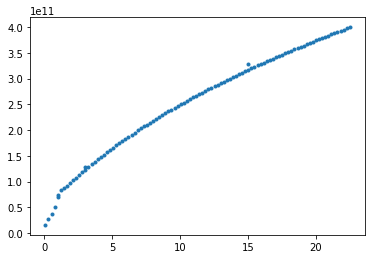

In [38]:
M_ref = [1,3,15]
p_ref = [1.482e17, 1.141e17, 2.769e16]
T_ref = [1.442e7, 2.347e7, 3.275e7]
R_ref = [6.932e10, 1.276e11, 3.289e11]
L_ref = [0.9083, 89.35, 1.960e4]    # it seems that one is logarithmically
                                    #spaced!


newM_ref = [0.08,0.306,0.533,0.759,0.986,1.212,1.439,1.665,1.892,2.118,2.345,2.571,2.798,3.024,3.251,3.477,3.703,3.93,4.156,4.383,4.609,4.836,5.062,5.289,5.515,5.742,5.968,6.195,6.421,6.647,6.874,7.1,7.327,7.553,7.78,8.006,8.233,8.459,8.686,8.912,9.139,9.365,9.592,9.818,10.044,10.271,10.497,10.724,10.95,11.177,11.403,11.63,11.856,12.083,12.309,12.536,12.762,12.988,13.215,13.441,13.668,13.894,14.121,14.347,14.574,14.8,15.027,15.253,15.48,15.706,15.933,16.159,16.385,16.612,16.838,17.065,17.291,17.518,17.744,17.971,18.197,18.424,18.65,18.877,19.103,19.329,19.556,19.782,20.009,20.235,20.462,20.688,20.915,21.141,21.368,21.594,21.821,22.047,22.274,22.5]
newp_ref = [2.5913e+16,5.465e+16,8.6424e+16,1.2353e+17,1.6988e+17,2.0925e+17,2.1463e+17,2.0247e+17,1.867e+17,1.714e+17,1.5756e+17,1.4535e+17,1.3462e+17,1.252e+17,1.1691e+17,1.0958e+17,1.0307e+17,9.7261e+16,9.2064e+16,8.739e+16,8.3173e+16,7.9351e+16,7.5877e+16,7.2709e+16,6.981e+16,6.7149e+16,6.4702e+16,6.2444e+16,6.0357e+16,5.8422e+16,5.6623e+16,5.495e+16,5.3393e+16,5.1936e+16,5.0572e+16,4.9293e+16,4.8092e+16,4.6963e+16,4.5902e+16,4.49e+16,4.3954e+16,4.306e+16,4.2213e+16,4.1408e+16,4.0646e+16,3.9924e+16,3.9235e+16,3.858e+16,3.7956e+16,3.7361e+16,3.6792e+16,3.625e+16,3.5732e+16,3.5235e+16,3.4761e+16,3.4305e+16,3.3869e+16,3.3442e+16,3.3042e+16,3.2658e+16,3.2289e+16,3.1932e+16,3.1587e+16,3.1255e+16,3.0936e+16,3.0627e+16,3.0329e+16,3.0043e+16,2.9765e+16,2.9496e+16,2.9238e+16,2.8987e+16,2.8744e+16,2.8509e+16,2.8282e+16,2.8061e+16,2.7848e+16,2.764e+16,2.7439e+16,2.7244e+16,2.7055e+16,2.6872e+16,2.6692e+16,2.6518e+16,2.6348e+16,2.6185e+16,2.6024e+16,2.5869e+16,2.5717e+16,2.557e+16,2.5427e+16,2.5287e+16,2.515e+16,2.5017e+16,2.4888e+16,2.4761e+16,2.4638e+16,2.4517e+16,2.44e+16,2.4285e+16]
newT_ref = [3601400.0,7140800.0,9772800.0,12226000.0,14877000.0,17511000.0,19333000.0,20503000.0,21371000.0,22080000.0,22690000.0,23233000.0,23724000.0,24176000.0,24594000.0,24985000.0,25352000.0,25698000.0,26026000.0,26337000.0,26633000.0,26915000.0,27185000.0,27443000.0,27691000.0,27929000.0,28158000.0,28378000.0,28591000.0,28796000.0,28993000.0,29185000.0,29372000.0,29552000.0,29726000.0,29896000.0,30060000.0,30220000.0,30374000.0,30525000.0,30671000.0,30814000.0,30953000.0,31090000.0,31222000.0,31351000.0,31478000.0,31601000.0,31722000.0,31839000.0,31955000.0,32068000.0,32177000.0,32285000.0,32391000.0,32494000.0,32595000.0,32694000.0,32792000.0,32889000.0,32982000.0,33074000.0,33165000.0,33252000.0,33339000.0,33426000.0,33510000.0,33593000.0,33674000.0,33757000.0,33832000.0,33910000.0,33986000.0,34061000.0,34135000.0,34207000.0,34279000.0,34349000.0,34418000.0,34486000.0,34554000.0,34620000.0,34685000.0,34750000.0,34813000.0,34876000.0,34938000.0,34998000.0,35058000.0,35117000.0,35176000.0,35234000.0,35291000.0,35347000.0,35403000.0,35457000.0,35511000.0,35565000.0,35618000.0,35670000.0]
newR_ref = [15891000000.0,27430000000.0,36770000000.0,50125000000.0,73183000000.0,84394000000.0,87326000000.0,91751000000.0,96810000000.0,102090000000.0,107420000000.0,112730000000.0,117970000000.0,123140000000.0,128220000000.0,133210000000.0,138120000000.0,142940000000.0,147680000000.0,152340000000.0,156920000000.0,161430000000.0,165870000000.0,170240000000.0,174550000000.0,178790000000.0,182970000000.0,187100000000.0,191170000000.0,195180000000.0,199130000000.0,203040000000.0,206930000000.0,210740000000.0,214520000000.0,218250000000.0,221940000000.0,225580000000.0,229170000000.0,232730000000.0,236250000000.0,239740000000.0,243190000000.0,246610000000.0,249980000000.0,253330000000.0,256640000000.0,259920000000.0,263170000000.0,266390000000.0,269580000000.0,272740000000.0,275860000000.0,278960000000.0,282040000000.0,285090000000.0,288110000000.0,291070000000.0,294060000000.0,297020000000.0,299950000000.0,302850000000.0,305730000000.0,308570000000.0,311410000000.0,314220000000.0,317010000000.0,319780000000.0,322530000000.0,325270000000.0,327970000000.0,330660000000.0,333330000000.0,335980000000.0,338620000000.0,341230000000.0,343830000000.0,346410000000.0,348980000000.0,351530000000.0,354060000000.0,356590000000.0,359080000000.0,361560000000.0,364020000000.0,366490000000.0,368920000000.0,371360000000.0,373770000000.0,376170000000.0,378560000000.0,380930000000.0,383280000000.0,385640000000.0,387970000000.0,390290000000.0,392620000000.0,394900000000.0,397200000000.0,399460000000.0]
newL_ref = [3.113149665447022e-05,0.007930489601281983,0.07466206543779416,0.3306739627988451,1.130576619657078,2.989509927814587,6.16311114741984,11.033162127669812,18.14261982038613,28.07372232343648,41.40950127434677,58.74893525297766,80.7049178911866,107.86983141660878,140.83156323665284,180.13578646691397,226.51658212545954,280.41419854536935,342.29456231604144,412.8573303779981,492.6063433495771,581.9691989817644,681.3966592828317,791.589454624261,912.8512193311221,1045.442135694148,1190.1453387038553,1347.1005082758036,1516.7010939163386,1699.417162886752,1895.3961755993425,2105.2321804752323,2331.309857418028,2570.987706415226,2824.8799749157074,3095.2804165939788,3380.6483620598156,3681.289736425313,3995.765566188054,4329.123745028265,4678.428536839501,5043.128102663999,5426.252513290146,5829.079788672337,6247.4098790155385,6680.362046792469,7133.456216702232,7605.013686927006,8094.685874176842,8602.01112713024,9132.716996648163,9676.09224577728,10235.286413287924,10816.829893379321,11415.633046188459,12033.722711826847,12673.600118311286,13322.937789769398,14005.544572422317,14706.184154045619,15424.105957495969,16154.741014619049,16916.090502776344,17672.5817784194,18462.903509747837,19288.568602156247,20114.071982009064,20974.90487978542,21847.41206479047,22766.69555330906,23642.85942401745,24581.025650893436,25527.013026612472,26497.20098878961,27485.269519646674,28497.05627341151,29525.686217289687,30577.3609569008,31644.62838835526,32726.533057537137,33837.63488617649,34954.250959859964,36107.71451003529,37273.48496903333,38459.178204535354,39655.18679916798,40888.38902676978,42121.12867540669,43381.04405465888,44658.07512933513,45962.11446660011,47282.453051179604,48618.325846498374,49980.43135782396,51357.04178483559,52747.27156616844,54150.19189534895,55590.42572704037,57042.690309986894,58505.945195000575]
M_ref = M_ref + newM_ref
p_ref = p_ref + newp_ref
T_ref = T_ref + newT_ref
R_ref = R_ref + newR_ref
L_ref = L_ref + newL_ref

plt.plot(M_ref, R_ref,'.')
Mi = np.linspace(1,18,100)
#inter = interp(M_ref, p_ref, fill_value='extrapolate',kind='cubic')
#plt.plot(np.log(M_ref), np.log(L_ref), '.')
#inter = interp(np.log(M_ref), np.log(L_ref), fill_value='extrapolate',kind='cubic')
#plt.plot(Mi,np.exp(inter(np.log(Mi))))


In [94]:
currentguess()

[[1.0, 1.482e+17, 14420000.0, 69320000000.0, 0.9083],
 [1.07035175879397,
  1.472166054724033e+17,
  14664076.590987926,
  71094842141.69978,
  0.8717087493097977],
 [1.1407035175879396,
  1.4615934896388086e+17,
  14933380.142247926,
  72965272998.05585,
  0.9214309936883069],
 [1.2110552763819096,
  1.4503482611736346e+17,
  15225661.747269422,
  74922719863.17612,
  1.0445497524318639],
 [1.2814070351758793,
  1.438496325757818e+17,
  15538672.499541823,
  76958610031.16861,
  1.2448042594328723],
 [1.3517587939698492,
  1.4261036398206661e+17,
  15870163.492554553,
  79064370796.1413,
  1.5361114802497557],
 [1.4221105527638191,
  1.4132361597914864e+17,
  16217885.819797026,
  81231429452.20216,
  1.9404299480535099],
 [1.492462311557789,
  1.3999598420995854e+17,
  16579590.574758662,
  83451213293.45923,
  2.4871174979398156],
 [1.5628140703517588,
  1.386340643174271e+17,
  16953028.850928873,
  85715149614.02043,
  3.21268544382209],
 [1.6331658291457285,
  1.3724445194448507e

In [6]:
def trying_read_params(filename, path=''):
    '''
    This function reads the simulation's outputs (only the parameters).
    It returns a tuple with the parameters
    D. Vallés

    Parameters:
    filename: name of the parameters file to output
    path: path where to find the file

    Returns: (as a tuple)
    m: mass
    x: H content
    y: He content
    p: central pressure
    Tc: central temperature
    R: radius
    L: total luminosity
    Teff: effective (surface) temperature
    L: luminosity (in solar units!)
    '''
    with open(os.path.join(path,filename)) as f:
        line = f.readline().split()
        m = float(line1[1].replace(',','').replace('D','e'))
        x = float(line1[3].replace(',','').replace('D','e'))
        y = float(line1[5].replace(',','').replace('D','e'))
        while f.readline().split()[0] != '*****FINAL':
            continue
        line = f.readline().split()
        p = float(line[1].replace(',','').replace('D','e'))
        Tc = float(line[3].replace(',','').replace('D','e'))
        R = float(line[5].replace(',','').replace('D','e'))
        L = float(line[7].replace(',','').replace('D','e'))
        line = f.readline().split()
        Teff = float(line[1].replace(',','').replace('D','e'))
        L = float(line[5].replace(',','').replace('D','e')) 
        
        return L

In [8]:
f = open('./old_output/output_0000.dat')
line = f.readline().split()
m = float(line[1].replace(',','').replace('D','e'))
x = float(line[3].replace(',','').replace('D','e'))
y = float(line[5].replace(',','').replace('D','e'))
while f.readline().split()[0] != '*****FINAL':
    continue
line = f.readline().split()
p = float(line[1].replace(',','').replace('D','e'))
Tc = float(line[3].replace(',','').replace('D','e'))
R = float(line[5].replace(',','').replace('D','e'))
L = float(line[7].replace(',','').replace('D','e'))
line = f.readline().split()
Teff = float(line[1].replace(',','').replace('D','e'))
L = float(line[5].replace(',','').replace('D','e')) 
        

In [9]:
f.close()

In [13]:
rd.read_params('./old_output/output_0020.dat')

[2.407,
 0.7,
 0.292,
 1.6716e+17,
 24028000.0,
 104010000000.0,
 2.4797e+35,
 13393.0,
 64.46143956044051]